# 逻辑回归1

## 1 概述

### 1.1 名为“回归”的分类器

在过去的四周中，我们接触了不少带“回归”二字的算法，回归树，随机森林的回归，无一例外他们都是区别于分类算法们，用来处理和预测连续型标签的算法。然而逻辑回归，是一种名为“回归”的线性分类器，其本质是由线性回归变化而来的，一种广泛使用于分类问题中的广义回归算法。要理解逻辑回归从何而来，得要先理解线性回归。线性回归是机器学习中最简单的的回归算法，它写作一个几乎人人熟悉的方程：

![image.png](https://www.zhihu.com/equation?tex=z+%3D+%5Ctheta_0+%2B+%5Ctheta_1x_1+%2B+%5Ctheta_2x_2%2B...%2B%5Ctheta_nx_n+%5C%5C)

被统称为模型的参数，其中![image.png](https://www.zhihu.com/equation?tex=%5Ctheta_0)被称为截距(intercept)，![image-2.png](https://www.zhihu.com/equation?tex=%5Ctheta_1)~ ![image-3.png](https://www.zhihu.com/equation?tex=%5Ctheta_n)被称为系数(coefficient)，这个表达式，其实就和我们小学时就无比熟悉的是同样的性质。我们可以使用矩阵来表示这个方程，其中x和都可以被看做是一个列矩阵，则有：

![image.png](https://www.zhihu.com/equation?tex=z+%3D+%5Cbegin%7Bbmatrix%7D+%5Ctheta_0%2C%5Ctheta_1%2C%5Ctheta_2...%5Ctheta_n%5Cend%7Bbmatrix%7D%2A%5Cbegin%7Bbmatrix%7D++++x_0+%5C%5C++++x_1+%5C%5C++++x_2+%5C%5C++++...+%5C%5C++++x_n+++%5Cend%7Bbmatrix%7D%3D+%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x+%5C+%5C+%28x_0+%3D1%29%5C%5C+)

线性回归的任务，就是构造一个预测函数来映射输入的特征矩阵x和标签值y的线性关系，而**构造预测函数的核心就是找出模型的参数：** ![image.png](https://www.zhihu.com/equation?tex=%5Ctheta%5ET)和![image.png](https://www.zhihu.com/equation?tex=%5Ctheta_0)，著名的最小二乘法就是用来求解线性回归中参数的数学方法。

通过函数​，线性回归使用输入的特征矩阵X来输出一组连续型的标签值y_pred，以完成各种预测连续型变量的任务（比如预测产品销量，预测股价等等）。那如果我们的标签是离散型变量，尤其是，如果是满足0-1分布的离散型变量，我们要怎么办呢？我们可以通过引入联系函数(link function)，将线性回归方程z变换为g(z)，并且令g(z)的值分布在(0,1)之间，且当g(z)接近0时样本的标签为类别0，当g(z)接近1时样本的标签为类别1，这样就得到了一个分类模型。而这个联系函数对于逻辑回归来说，就是Sigmoid函数：

![image.png](https://www.zhihu.com/equation?tex=g%28z%29+%3D+%5Cfrac1%7B1%2Be%5E%7B-z%7D%7D%5C%5C)

![image.png](https://pic2.zhimg.com/80/v2-3e839eb9eec639b809bfe22ce5dfb191_720w.jpg)

**面试高危问题：Sigmoid函数的公式和性质：** Sigmoid函数是一个S型的函数，当自变量z趋近正无穷时，因变量g(z)趋近于1，而当z趋近负无穷时，g(z)趋近于0，它能够将任何实数映射到(0,1)区间，使其可用于将任意值函数转换为更适合二分类的函数。因为这个性质，Sigmoid函数也被当作是归一化的一种方法，与我们之前学过的MinMaxSclaer同理，是属于数据预处理中的“缩放”功能，可以将数据压缩到[0,1]之内。区别在于，MinMaxScaler归一化之后，是可以取到0和1的（最大值归一化后就是1，最小值归一化后就是0），但Sigmoid函数只是无限趋近于0和1。

线性回归![image.png](https://www.zhihu.com/equation?tex=z%3D%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x)中​，于是我们将z带入，就得到了二元逻辑回归模型的一般形式：

![image.png](https://www.zhihu.com/equation?tex=g%28z%29+%3D+y%28x%29+%3D+%5Cfrac%7B1%7D%7B1%2Be%5E%7B-%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%7D%5C%5C+)

而​就是我们逻辑回归返回的标签值。此时，y(x)​的取值都在[0,1]之间，因此y(x)​和1-y(x)​相加必然为1。如果我们令y(x)​除以1-y(x)​可以得到形似几率(odds)的 ![image.png](https://www.zhihu.com/equation?tex=%5Cfrac%7By%28x%29%7D%7B1-y%28x%29%7D)，在此基础上取对数，可以很容易就得到：

![image.png](https://www.zhihu.com/equation?tex=%5Cbegin%7Bequation%7D+%5Cbegin%7Baligned%7D+ln%5Cfrac%7By%28x%29%7D%7B1-y%28x%29%7D+%26%3D++ln%28%5Cfrac%7B%5Cfrac%7B1%7D%7B1%2Be%5E%7B-%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%7D%7D+%7B1+-%5Cfrac%7B1%7D%7B1%2Be%5E%7B-%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%7D%7D%29+%5C%5C+%5C%5C+%26%3Dln%28+%5Cfrac%7B%5Cfrac%7B1%7D%7B1%2Be%5E%7B-%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%7D%7D+%7B%5Cfrac%7Be%5E%7B-%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%7D%7B1%2Be%5E%7B-%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%7D%7D%29+%5C%5C+%5C%5C+%26%3D+ln%28%5Cfrac%7B1%7D%7Be%5E%7B-%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%7D%29++%5C%5C+%5C%5C+%26%3Dln%28e%5E%7B%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x%7D%29+%5C%5C+%5C%5C+%26%3D%5Cboldsymbol%5Ctheta%5ET%5Cboldsymbol+x+%5Cend%7Baligned%7D+%5Cend%7Bequation%7D%5C%5C)

不难发现，y(x)的形似几率取对数的本质其实就是我们的线性回归z，我们实际上是在对线性回归模型的预测结果取对数几率来让其的结果无限逼近0和1。因此，其对应的模型被称为”对数几率回归“（logistic Regression），也就是我们的逻辑回归，这个名为“回归”却是用来做分类工作的分类器。

之前我们提到过，线性回归的核心任务是通过求解![image.png](https://www.zhihu.com/equation?tex=%5Cboldsymbol%5Ctheta) 构建​这个预测函数，并希望预测函数z​能够尽量拟合数据，因此逻辑回归的核心任务也是类似的：求解 ![image.png](https://www.zhihu.com/equation?tex=%5Cboldsymbol%5Ctheta)来构建一个能够尽量拟合数据的预测函数y(x)​，并通过向预测函数中输入特征矩阵来获取相应的标签值y。

**思考：y(x)代表了样本为某一类标签的概率吗？**

![image.png](https://www.zhihu.com/equation?tex=ln%5Cfrac%7By%28x%29%7D%7B1-y%28x%29%7D)是形似对数几率的一种变化。而几率odds的本质其实是 ![image.png](https://www.zhihu.com/equation?tex=%5Cfrac%7Bp%7D%7B1-p%7D+)，其中p是事件A发生的概率，而1-p是事件A不会发生的概率，并且p+(1-p)=1。因此，很多人在理解逻辑回归时，都对y(x)做出如下的解释：<br>
我们让线性回归结果逼近0和1，此时y(x)​和1-y(x)​之和为1，因此它们可以被我们看作是一对正反例发生的概率，即y(x)​是某样本i的标签被预测为1的概率，而​1-y(x)是i的标签被预测为0的概率， ![image.png](https://www.zhihu.com/equation?tex=%5Cfrac%7By%28x%29%7D%7B1-y%28x%29%7D)就是样本i的标签被预测为1的相对概率。<br>
基于这种理解，我们使用最大似然法和概率分布函数推到出逻辑回归的损失函数，并且把返回样本在标签取值上的概率当成是逻辑回归的性质来使用，每当我们诉求概率的时候，我们都会使用逻辑回归。然而这种理解是正确的吗？<br>
概率是度量偶然事件发生可能性的数值，尽管逻辑回归的取值在(0,1)之间，并且​y(x)和1-y(x)​之和的确为1，但光凭这个性质，我们就可以认为y(x)​代表了样本x在标签上取值为1的概率吗？设想我们使用MaxMinScaler对特征进行归一化后，任意特征的取值也在[0,1]之间，并且任意特征的取值![image.png](https://www.zhihu.com/equation?tex=x_0)和![image.png](https://www.zhihu.com/equation?tex=1-x_0) 也能够相加为1，但我们却不会认为0-1归一化后的特征是某种概率。**逻辑回归返回了概率**这个命题，这种说法严谨吗？<br>
但无论如何，长年以来人们都是以”返回概率“的方式来理解逻辑回归，并且这样使用它的性质。可以说，逻辑回归返回的数字，即便本质上不是概率，却也有着概率的各种性质，可以被当成是概率来看待和使用。

### 1.2 为什么需要逻辑回归

线性回归对数据的要求很严格，比如标签必须满足正态分布，特征之间的多重共线性需要消除等等，而现实中很多真实情景的数据无法满足这些要求，因此线性回归在很多现实情境的应用效果有限。逻辑回归是由线性回归变化而来，因此它对数据也有一些要求，而我们之前已经学过了强大的分类模型决策树和随机森林，它们的分类效力很强，并且不需要对数据做任何预处理。<br>
<br>
何况，逻辑回归的原理其实并不简单。一个人要理解逻辑回归，必须要有一定的数学基础，必须理解损失函数，正则化，梯度下降，海森矩阵等等这些复杂的概念，才能够对逻辑回归进行调优。其涉及到的数学理念，不比支持向量机少多少。况且，要计算概率，朴素贝叶斯可以计算出真正意义上的概率，要进行分类，机器学习中能够完成二分类功能的模型简直多如牛毛。因此，在数据挖掘，人工智能所涉及到的医疗，教育，人脸识别，语音识别这些领域，逻辑回归没有太多的出场机会。<br>
<br>
甚至，在我们的各种机器学习经典书目中，周志华的《机器学习》400页仅有一页纸是关于逻辑回归的（还是一页数学公式），《数据挖掘导论》和《Python数据科学手册》中完全没有逻辑回归相关的内容，sklearn中对比各种分类器的效应也不带逻辑回归玩，可见业界地位。<br>
<br>
但是，无论机器学习领域如何折腾，逻辑回归依然是一个受工业商业热爱，使用广泛的模型，因为它有着不可替代的优点：<br>
<br>
**1、逻辑回归对线性关系的拟合效果好到丧心病狂**，特征与标签之间的线性关系极强的数据，比如金融领域中的信用卡欺诈，评分卡制作，电商中的营销预测等等相关的数据，都是逻辑回归的强项。虽然现在有了梯度提升树GDBT，比逻辑回归效果更好，也被许多数据咨询公司启用，但逻辑回归在金融领域，尤其是银行业中的统治地位依然不可动摇（相对的，逻辑回归在非线性数据的效果很多时候比瞎猜还不如，所以如果你已经知道数据之间的联系是非线性的，千万不要迷信逻辑回归）<br>
**2、逻辑回归计算快：** 对于线性数据，逻辑回归的拟合和计算都非常快，计算效率优于SVM和随机森林，亲测表示在大型数据上尤其能够看得出区别<br>
**3、逻辑回归返回的分类结果不是固定的0，1，而是以小数形式呈现的类概率数字：** 我们因此可以把逻辑回归返回的结果当成连续型数据来利用。比如在评分卡制作时，我们不仅需要判断客户是否会违约，还需要给出确定的”信用分“，而这个信用分的计算就需要使用类概率计算出的对数几率，而决策树和随机森林这样的分类器，可以产出分类结果，却无法帮助我们计算分数（当然，在sklearn中，决策树也可以产生概率，使用接口predict_proba调用就好，但一般来说，正常的决策树没有这个功能）。<br>
<br>
另外，逻辑回归还有抗噪能力强的优点。福布斯杂志在讨论逻辑回归的优点时，甚至有着“技术上来说，最佳模型的AUC面积低于0.8时，逻辑回归非常明显优于树模型”的说法。并且，逻辑回归在小数据集上表现更好，在大型的数据集上，树模型有着更好的表现。<br>
<br>
由此，我们已经了解了逻辑回归的本质，它是一个返回对数几率的，在线性数据上表现优异的分类器，它主要被应用在金融领域。**其数学目的是求解能够让模型对数据拟合程度最高的参数​的值，以此构建预测函数y(x)​，然后将特征矩阵输入预测函数来计算出逻辑回归的结果y。** 注意，虽然我们熟悉的逻辑回归通常被用于处理二分类问题，但逻辑回归也可以做多分类。

### 1.3 sklearn中的逻辑回归

![image.png](https://pic4.zhimg.com/80/v2-e6d5145cf46e968800e7e5bb1db401b7_720w.jpg)

## 2 linear_model.LogisticRegression

class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)

### 2.1 二元逻辑回归的损失函数

#### 2.1.1 损失函数的概念与解惑

在学习决策树和随机森林时，我们曾经提到过两种模型表现：在训练集上的表现，和在测试集上的表现。我们建模，是追求模型在测试集上的表现最优，因此模型的评估指标往往是用来衡量模型在测试集上的表现的。然而，逻辑回归有着基于训练数据求解参数![image.png](https://www.zhihu.com/equation?tex=%5Cboldsymbol%5Ctheta) 的需求，并且希望训练出来的模型能够尽可能地拟合训练数据，即模型在训练集上的预测准确率越靠近100%越好。<br>
<br>
因此，我们使用”**损失函数**“这个评估指标，来**衡量参数为​的模型拟合训练集时产生的信息损失的大小，并以此衡量参数![image.png](https://www.zhihu.com/equation?tex=%5Cboldsymbol%5Ctheta)的优劣**。如果用一组参数建模后，模型在训练集上表现良好，那我们就说模型拟合过程中的损失很小，损失函数的值很小，这一组参数就优秀；相反，如果模型在训练集上表现糟糕，损失函数就会很大，模型就训练不足，效果较差，这一组参数也就比较差。即是说，我们在求解参数![image.png](https://www.zhihu.com/equation?tex=%5Cboldsymbol%5Ctheta)时，追求损失函数最小，让模型在训练数据上的拟合效果最优，即预测准确率尽量靠近100%。

**关键概念：损失函数**

- 衡量参数​的优劣的评估指标，用来求解最优参数的工具<br>
- 损失函数小，模型在训练集上表现优异，拟合充分，参数优秀<br>
- 损失函数大，模型在训练集上表现差劲，拟合不足，参数糟糕<br>
- **我们追求，能够让损失函数最小化的参数组合**<br><br>
- 注意：没有”求解参数“需求的模型没有损失函数，比如KNN，决策树<br>

逻辑回归的损失函数是由极大似然估计推导出来的，具体结果可以写作：

![image.png](https://www.zhihu.com/equation?tex=J%28%5Ctheta%29+%3D+-%5Csum_%7Bi%3D1%7D%5E%7Bm%7D%28y_i%2Alog%28y_%5Ctheta%28x_i%29%29%5C++%2B%5C++%281-y_i%29%2Alog%281-y_%5Ctheta%28x_i%29%29%29%5C%5C+)

其中， ![image.png](https://www.zhihu.com/equation?tex=%5Ctheta)表示求解出来的一组参数，m是样本的个数，![image.png](https://www.zhihu.com/equation?tex=y_i)是样本i上真实的标签，![image.png](https://www.zhihu.com/equation?tex=y_%5Ctheta%28x_i%29) 是样本i上，基于参数 ![image.png](https://www.zhihu.com/equation?tex=%5Ctheta)计算出来的逻辑回归返回值（预测值），![image.png](https://www.zhihu.com/equation?tex=x_i)是样本i各个特征的取值。我们的目标，就是求解出使![image.png](https://www.zhihu.com/equation?tex=J%28%5Ctheta%29)最小的![image.png](https://www.zhihu.com/equation?tex=%5Ctheta)取值。注意，在逻辑回归的本质函数y(x)里，特征矩阵x是自变量，参数是![image.png](https://www.zhihu.com/equation?tex=%5Ctheta)。但在损失函数中，参数 ![image.png](https://www.zhihu.com/equation?tex=%5Ctheta)是损失函数的自变量，x和y都是已知的特征矩阵和标签，相当于是损失函数的参数。不同的函数中，自变量和参数各有不同，因此大家需要在数学计算中，尤其是求导的时候避免混淆。

由于我们追求损失函数的最小值，让模型在训练集上表现最优，可能会引发另一个问题：如果模型在训练集上表示优秀，却在测试集上表现糟糕，模型就会过拟合。虽然逻辑回归和线性回归是天生欠拟合的模型，但我们还是需要控制过拟合的技术来帮助我们调整模型，**对逻辑回归中过拟合的控制，通过正则化来实现。**

### 2.2 重要参数penalty & C

#### 2.2.1 正则化

**正则化是用来防止模型过拟合的过程**，常用的有L1正则化和L2正则化两种选项，分别通过在损失函数后加上参数向量![image.png](https://www.zhihu.com/equation?tex=%5Ctheta) 的L1范式和L2范式的倍数来实现。这个增加的范式，被称为“正则项”，也被称为"惩罚项"。损失函数改变，基于损失函数的最优化来求解的参数取值必然改变，我们以此来调节模型拟合的程度。其中L1范式表现为参数向量中的每个参数的绝对值之和，L2范数表现为参数向量中的每个参数的平方和的开方值。

![image.png](https://www.zhihu.com/equation?tex=J%28%5Ctheta%29_%7BL1%7D+%3D+C%2AJ%28%5Ctheta%29+%2B+%5Csum_%7Bj%3D1%7D%5E%7Bn%7D%7C%5Ctheta_j%7C%5C+%5C+%28j%5Cge1%29%5C%5CJ%28%5Ctheta%29_%7BL2%7D+%3D+C%2AJ%28%5Ctheta%29+%2B+%5Csqrt%7B%5Csum_%7Bj%3D1%7D%5E%7Bn%7D%28%5Ctheta_j%29%5E2%7D%5C+%5C+%28j%5Cge1%29%5C%5C)

其中![image.png](https://www.zhihu.com/equation?tex=J%28%5Ctheta%29)是我们之前提过的损失函数，C是用来控制正则化程度的超参数，n是方程中特征的总数，也是方程中参数的总数，j代表每个参数。在这里，j要大于等于1，是因为我们的参数向量![image-2.png](https://www.zhihu.com/equation?tex=%5Cboldsymbol%5Ctheta)中，第一个参数是![image-3.png](https://www.zhihu.com/equation?tex=%5Ctheta_0)，是我们的截距，它通常是不参与正则化的。

在许多书籍和博客中，大家可能也会见到如下的写法：

![image.png](https://www.zhihu.com/equation?tex=%5Cbegin%7Bequation%7D+%5Cbegin%7Baligned%7D+J%28%5Ctheta%29_%7BL1%7D+%26%3D+J%28%5Ctheta%29+%2B+%5Cfrac%7B1%7D%7B2b%5E2%7D%5Csum_%7Bj%7D%7C%5Ctheta_j%7C+%5C%5C+J%28%5Ctheta%29_%7BL2%7D+%26%3DJ%28%5Ctheta%29%2B+%5Cfrac%7B%5Ctheta%5E%7BT%7D%5Ctheta%7D%7B2%5Csigma%5E2%7D++%5Cend%7Baligned%7D+%5Cend%7Bequation%7D%5C%5C)

其实和上面我们展示的式子的本质是一模一样的。不过在大多数教材和博客中，常数项是乘以正则项，通过调控正则项来调节对模型的惩罚。而sklearn当中，常数项C是在损失函数的前面，通过调控损失函数本身的大小，来调节对模型的惩罚。

![image.png](https://pic1.zhimg.com/v2-100d8ce89fefb461d7b1ded80fc759bc_r.jpg)

L1正则化和L2正则化虽然都可以控制过拟合，但它们的效果并不相同。当正则化强度逐渐增大（即C逐渐变小），参数![image.png](https://www.zhihu.com/equation?tex=%5Ctheta)的取值会逐渐变小，但**L1正则化会将参数压缩为0（稀疏性），L2正则化只会让参数尽量小，不会取到0（稠密）。**

在L1正则化在逐渐加强的过程中，携带信息量小的、对模型贡献不大的特征的参数，会比携带大量信息的、对模型有巨大贡献的特征的参数更快地变成0，所以L1正则化本质是一个特征选择的过程，掌管了参数的“稀疏性”。L1正则化越强，参数向量中就越多的参数为0，参数就越稀疏，选出来的特征就越少，以此来防止过拟合。因此，如果特征量很大，数据维度很高，我们会倾向于使用L1正则化。由于L1正则化的这个性质，逻辑回归的特征选择可以由Embedded嵌入法来完成。<br>
<br>
相对的，L2正则化在加强的过程中，会尽量让每个特征对模型都有一些小的贡献，但携带信息少，对模型贡献不大的特征的参数会非常接近于0。通常来说，如果我们的主要目的只是为了防止过拟合，选择L2正则化就足够了。但是如果选择L2正则化后还是过拟合，模型在未知数据集上的效果表现很差，就可以考虑L1正则化。<br>
<br>
而两种正则化下C的取值，都可以通过学习曲线来进行调整。<br>
<br>
建立两个逻辑回归，L1正则化和L2正则化的差别就一目了然了：

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [41]:
X = data.data

In [42]:
X.shape

(569, 30)

In [43]:
y = data.target

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [9]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)
lrl1.coef_

array([[ 3.98485827,  0.03132139, -0.13511715, -0.01618555,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50279292,  0.        , -0.07122303,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24512144, -0.12821079, -0.01443899,  0.        ,
         0.        , -2.05932647,  0.        ,  0.        ,  0.        ]])

In [10]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [11]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61358623e+00,  1.00284781e-01,  4.61036191e-02,
        -4.21333984e-03, -9.27388895e-02, -3.00561176e-01,
        -4.53477303e-01, -2.19973055e-01, -1.33257382e-01,
        -1.92654788e-02,  1.87887747e-02,  8.75532438e-01,
         1.31708341e-01, -9.53440922e-02, -9.64408195e-03,
        -2.52457845e-02, -5.83085040e-02, -2.67948347e-02,
        -2.74103894e-02, -6.09326731e-05,  1.28405755e+00,
        -3.00219699e-01, -1.74217870e-01, -2.23449384e-02,
        -1.70489339e-01, -8.77400140e-01, -1.15869741e+00,
        -4.22909464e-01, -4.12968162e-01, -8.66604813e-02]])

可以看见，当我们选择L1正则化的时候，许多特征的参数都被设置为了0，这些特征在真正建模的时候，就不会出现在我们的模型当中了，而L2正则化则是对所有的特征都给出了参数。<br>
<br>
究竟哪个正则化的效果更好呢？还是都差不多？

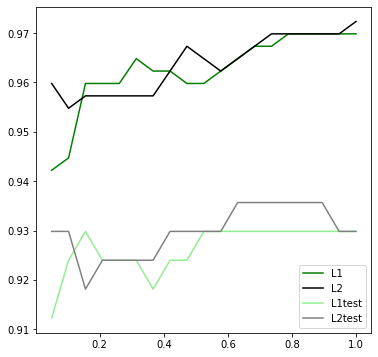

In [12]:
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角 shift+tab
plt.show()

可见，至少在我们的乳腺癌数据集下，两种正则化的结果区别不大。但随着C的逐渐变大，正则化的强度越来越小，模型在训练集和测试集上的表现都呈上升趋势，直到C=0.8左右，训练集上的表现依然在走高，但模型在未知数据集上的表现开始下跌，这时候就是出现了过拟合。我们可以认为，C设定为0.8会比较好。在实际使用时，基本就默认使用l2正则化，如果感觉到模型的效果不好，那就换L1试试看。

#### 2.2.2逻辑回归中的特征工程

![image.png](./images/41.png)

![image.png](./images/42.png)

![image.png](./images/43.png)

![image.png](./images/44.png)

![image.png](./images/45.png)

![image.png](./images/46.png)

果保持优秀，因此我们不考虑训练集测试集的问题，把所有的数据都放入模型进行降维。

In [13]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [14]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [16]:
LR_ = LR(solver="liblinear",C=0.8,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508145363408522

In [20]:
#norm_order=1 使用L1范式来进行筛选
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
X_embedded.shape

(569, 9)

In [21]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368107769423559

![image.png](./images/47.png)

对threshold来画学习曲线：

In [22]:
abs(LR_.fit(data.data,data.target).coef_)

array([[1.93768811, 0.11043439, 0.02735835, 0.00348634, 0.13393017,
        0.36832435, 0.58126356, 0.30059275, 0.19472324, 0.02390028,
        0.0118195 , 1.12355416, 0.04154346, 0.0940047 , 0.01455166,
        0.0049955 , 0.05152943, 0.0357842 , 0.03753081, 0.00419989,
        1.24568564, 0.32750188, 0.13641346, 0.02365124, 0.24773624,
        1.05052963, 1.44362278, 0.57877479, 0.6012674 , 0.10534285]])

0.0 30
0.1019835845615114 17
0.2039671691230228 12
0.30595075368453417 10
0.4079343382460456 8
0.509917922807557 8
0.6119015073690683 5
0.7138850919305798 5
0.8158686764920912 5
0.9178522610536025 5
1.019835845615114 5
1.1218194301766253 4
1.2238030147381367 3
1.325786599299648 2
1.4277701838611596 2
1.529753768422671 1
1.6317373529841823 1
1.7337209375456937 1
1.835704522107205 1
1.9376881066687164 1


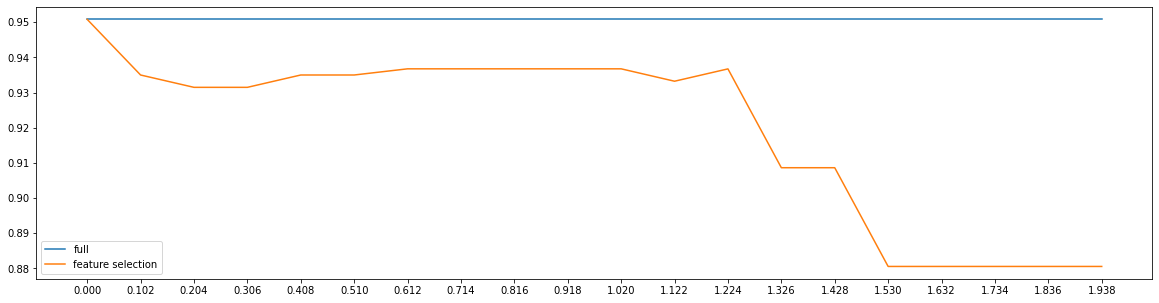

In [24]:
fullx = []
fsx = []

#此时，我们使用的判断标准，就不是L1范数，而是逻辑回归中的系数了
threshold = np.linspace(0,abs(LR_.fit(data.data,data.target).coef_).max(),20)

k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print(threshold[k],X_embedded.shape[1])
    k+=1
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

![image.png](./images/48.png)

0.8822994987468672 0.01
0.9244987468671677 0.51
0.9368107769423559 1.01
0.9438283208020051 1.51
0.9473370927318296 2.01
0.9473370927318296 2.01
0.9473370927318296 2.01
0.9508458646616542 3.51
0.9526002506265664 4.01
0.9543546365914788 4.51
0.9543546365914788 4.51
0.9543546365914788 4.51
0.9561090225563911 6.01
0.9561090225563911 6.01
0.9561090225563911 6.01
0.9561090225563911 6.01
0.9561090225563911 6.01
0.9561090225563911 6.01
0.9561090225563911 6.01
0.9561090225563911 6.01


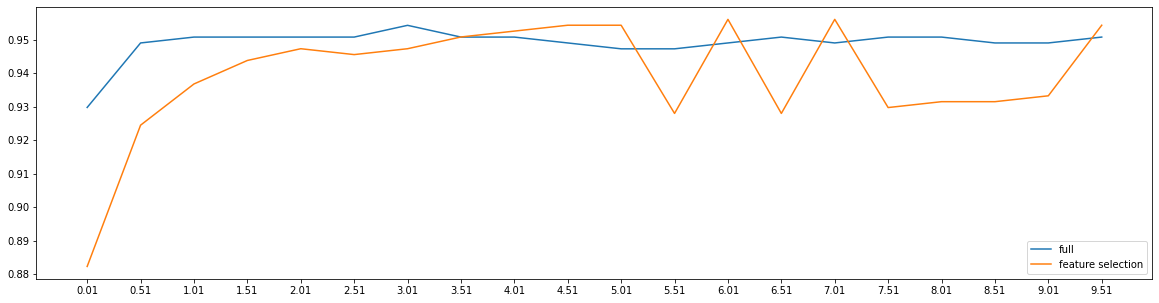

In [28]:
fullx = []
fsx = []

C = np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

**细化学习曲线：**

0.9561090225563911 6.079999999999999


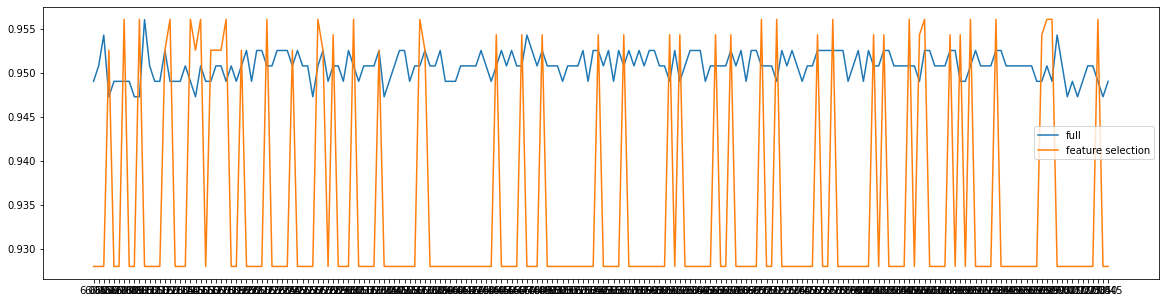

In [30]:
fullx = []
fsx = []

C = np.arange(6.05,7.05,0.005)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [35]:
LR_ = LR(solver="liblinear",C=6.079999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9490601503759398

In [36]:
LR_ = LR(solver="liblinear",C=6.079999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

In [37]:
X_embedded.shape

(569, 9)

![image.png](./images/49.png)

## 2.3梯度下降：重要参数max_iter

![image.png](./images/50.png)
带两个特征。。

![image.png](./images/51.png)

![image.png](./images/52.png)

![image.png](./images/53.png)

![image.png](./images/54.png)

![image.png](./images/55.png)

![image.png](./images/56.png)

![image.png](./images/57.png)

![image.png](./images/58.png)

![image.png](./images/59.png)

![image.png](./images/60.png)

![image.png](./images/61.png)

![image.png](./images/62.png)

![image.png](./images/63.png)

![image.png](./images/64.png)

![image.png](./images/65.png)

e:\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


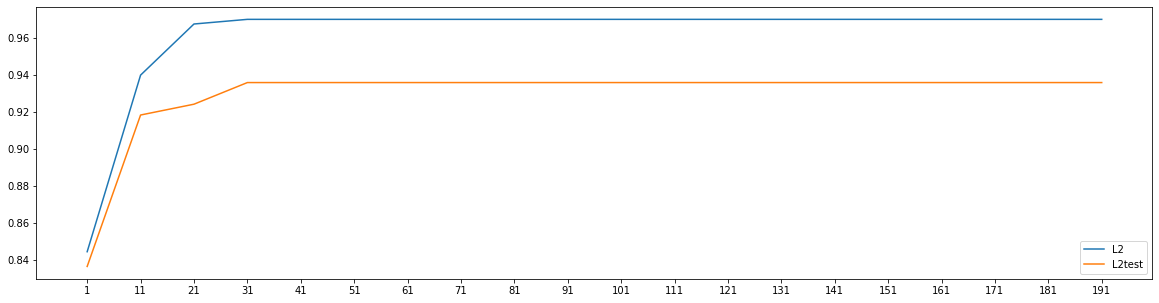

In [48]:
l2=[]
l2test=[]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.8,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l2,l2test]
color=["black","gray"]
label=["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [50]:
#我们可以使用属性n_iter_来调用本次求解中真正实现的迭代次数

lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([25], dtype=int32)

![image.png](./images/66.png)

**2.4二元回归与多元回归：重要参数solver & multi_class**

![image.png](./images/67.png)

![image.png](./images/68.png)

来看看鸢尾花数据集上，multinomail和ovr的区别怎么样：

In [56]:
from sklearn.datasets import load_iris
iris = load_iris()

for multi_class in ('multinomial','ovr'):
    clf = LR(solver="sag",max_iter=100,random_state=42,
            multi_class=multi_class).fit(iris.data,iris.target)

#打印两种multi_class模式下的训练分数
#%的用法：用%来代替打印的字符串中，想要变量替换的部分。%.3f表示，保留三保留三位小数的浮点数，%s表示字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元组中就需要有几个变量

    print("training score:%.3f (%s)" % (clf.score(iris.data,iris.target),multi_class))

training score:0.987 (multinomial)
training score:0.960 (ovr)


e:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
e:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


![image.png](./images/69.png)

![image.png](./images/70.png)

注：截图来源于B站菜菜的教学视频。